In [1]:
install.packages('quantmod')
library(quantmod)

package 'quantmod' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\HP\AppData\Local\Temp\Rtmp2na4pG\downloaded_packages


Warning message:
"package 'quantmod' was built under R version 3.6.3"Loading required package: xts
Warning message:
"package 'xts' was built under R version 3.6.3"Loading required package: zoo
Warning message:
"package 'zoo' was built under R version 3.6.3"
Attaching package: 'zoo'

The following objects are masked from 'package:base':

    as.Date, as.Date.numeric

Loading required package: TTR
Warning message:
"package 'TTR' was built under R version 3.6.3"Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 


In [2]:
# Retreving data - We would be using Wilshire 5000 Market index
wilsh <- getSymbols("WILL5000IND",src="FRED",auto.assign=FALSE)
wislh <- na.omit(wilsh)
wilsh <- wislh["1979-12-31/2017-12-31"]
names(wilsh) <- "TR" # we give the column name TR  to our data

'getSymbols' currently uses auto.assign=TRUE by default, but will
use auto.assign=FALSE in 0.5-0. You will still be able to use
'loadSymbols' to automatically load data. getOption("getSymbols.env")
and getOption("getSymbols.auto.assign") will still be checked for
alternate defaults.

This message is shown once per session and may be disabled by setting 
options("getSymbols.warning4.0"=FALSE). See ?getSymbols for details.



In [3]:
head(wilsh,3)

             TR
1979-12-31 1.90
1980-01-02 1.86
1980-01-04 1.88

In [4]:
tail(wilsh,3)

               TR
2017-12-27 124.04
2017-12-28 124.33
2017-12-29 123.67

In [5]:
# Retreving data - We would be using Wilshire 5000 Market index
wilsh1 <- getSymbols("GOLDPMGBD228NLBM",src="FRED",auto.assign=FALSE)
wislh1 <- na.omit(wilsh1)
wilsh1 <- wislh1["1979-12-31/2017-12-31"]
names(wilsh1) <- "TR" # we give the column name TR  to our data

In [6]:
head(wilsh1,3)

              TR
1980-01-02 559.5
1980-01-03 634.0
1980-01-04 588.0

In [7]:
tail(wilsh1,3)

                TR
2017-12-21 1264.55
2017-12-27 1279.40
2017-12-28 1291.00

### Calculating Holding Period Return
ret@t = wilsh @ t / wilsh @ t-1] - 1

Our stock prices cannot fall below 100% of our valuation but it can rise above 100%
so its value cannot be -ve = So we modify the formula


log re@t = log(1+ re@t) simplyfying with the above eqn

log re@t = log(wilsh@t) - log(wilsh@t-1)

discreet return , re@t = exp(logre@t) - 1

In [8]:
# The R code to find Log-return
logret <- diff(log(wilsh$TR))
head(logret,3)

                    TR
1979-12-31          NA
1980-01-02 -0.02127740
1980-01-04  0.01069529

In [9]:
# The R code to find log-return, removing missing First Observation

logret <- diff(log(wilsh$TR))[-1]
round(head(logret,3),6)   # round function to display 6 decimals

# First Value interpretation 
# the value of us stock fell by 2.123% from 31st Dec. 1979 -- 01-02-1980 (jan 2nd)

                  TR
1980-01-02 -0.021277
1980-01-04  0.010695
1980-01-07  0.005305

In [10]:
# Now Calculate the discreet Return from the formula of exp.
ret <- exp(logret)-1
round(head(ret,3),6)


                  TR
1980-01-02 -0.021053
1980-01-04  0.010753
1980-01-07  0.005319

In [11]:
# Now doing the same with Gold retuns data using wilsh1
# The R code to find Log-return
logret1 <- diff(log(wilsh1$TR))
head(logret1,3)

                    TR
1980-01-02          NA
1980-01-03  0.12500543
1980-01-04 -0.07532201

In [12]:
# The R code to find log-return, removing missing First Observation

logret1 <- diff(log(wilsh1$TR))[-1]
round(head(logret1,3),6)   # round function to display 6 decimals

# First Value interpretation 
# the value of us stock fell by 2.123% from 31st Dec. 1979 -- 01-02-1980 (jan 2nd)

                  TR
1980-01-03  0.125005
1980-01-04 -0.075322
1980-01-07  0.074533

In [13]:
# Now Calculate the discreet Return from the formula of exp.
ret1 <- exp(logret1)-1
round(tail(ret1,3),6)

                 TR
2017-12-21 0.000000
2017-12-27 0.011743
2017-12-28 0.009067

### How to calculate  from 1-day return to 2-Day-Return
1) Start with 1-day log-return from t-1 to t : log(ret@t)

2) Start with 2-day log-return, from t-2 to t : log(ret@t) + log(ret@t-1)

3) Calculate 2-day dicrete return : exp(logret@t + logret@t-1)-1

### From 1-day log-return to n-day log return

1) Start with 1-day log-return , from t-1 to t: logret@t

2) Calculate  n-day log-return, from t-n to t : log-ret@t + ----+ ----logret@t-n+1

3) Calculate n-day discrete return:
   
   exp(logret@t + logret@t-1 + ---- + logret@t-n+1) -- 1

In [14]:
# Weekly log-return

logret_w <- apply.weekly(wilsh,sum)

round(head(logret_w,3),6)


             TR
1980-01-04 5.64
1980-01-11 9.65
1980-01-18 9.84

In [15]:
# Calculate discrete return from log-return

ret_w <- exp(logret_w)-1

ret_w

                      TR
1980-01-04  2.804627e+02
1980-01-11  1.552079e+04
1980-01-18  1.876872e+04
1980-01-25  2.224684e+04
1980-02-01  2.663449e+04
1980-02-08  3.003044e+04
1980-02-15  3.419965e+04
1980-02-22  3.788540e+03
1980-02-29  2.559010e+04
1980-03-07  1.953472e+04
1980-03-14  1.296389e+04
1980-03-21  9.508057e+03
1980-03-28  6.123179e+03
1980-04-03  1.338431e+03
1980-04-11  8.603151e+03
1980-04-18  8.183521e+03
1980-04-25  9.413440e+03
1980-05-02  1.161339e+04
1980-05-09  1.208738e+04
1980-05-16  1.283488e+04
1980-05-23  1.583435e+04
1980-05-30  2.834575e+03
1980-06-06  2.247043e+04
1980-06-13  3.033226e+04
1980-06-20  3.125604e+04
1980-06-27  3.318887e+04
1980-07-03  4.145418e+03
1980-07-11  4.135613e+04
1980-07-18  5.205108e+04
1980-07-25  5.927738e+04
1980-08-01  6.047489e+04
1980-08-08  6.617016e+04
1980-08-15  8.581837e+04
1980-08-22  8.581837e+04
1980-08-29  8.843196e+04
1980-09-05  1.030004e+04
1980-09-12  1.048190e+05
1980-09-19  1.429132e+05
1980-09-26  1.579437e+05


In [16]:
# R also has function to create monthly, quarterly , yearly returns

# apply.monthly
#apply.quarterly
#apply.yearly

In [17]:
# Assignment
# Weekly log-return

logret_w <- apply.weekly(wilsh1,sum)

logret_w


                 TR
1980-01-04 1781.500
1980-01-11 3076.550
1980-01-18 3689.000
1980-01-25 3667.500
1980-02-01 3318.750
1980-02-08 3452.000
1980-02-15 3450.750
1980-02-22 3214.750
1980-02-29 3177.750
1980-03-07 3143.500
1980-03-14 2820.450
1980-03-21 2578.500
1980-03-28 2588.250
1980-04-03 1990.250
1980-04-11 2138.500
1980-04-18 2575.850
1980-04-25 2582.100
1980-05-02 2558.500
1980-05-09 2046.500
1980-05-16 2583.750
1980-05-23 2547.250
1980-05-30 2096.400
1980-06-06 2864.250
1980-06-13 3022.150
1980-06-20 2991.150
1980-06-27 3084.000
1980-07-04 3305.000
1980-07-11 3349.500
1980-07-18 3127.500
1980-07-25 3156.500
1980-08-01 3155.500
1980-08-08 3148.500
1980-08-15 3087.750
1980-08-22 3155.450
1980-08-29 2529.250
1980-09-05 3203.750
1980-09-12 3388.500
1980-09-19 3353.500
1980-09-26 3528.000
1980-10-03 3354.250
1980-10-10 3405.900
1980-10-17 3370.750
1980-10-24 3237.000
1980-10-31 3184.500
1980-11-07 3166.500
1980-11-14 3065.000
1980-11-21 3125.750
1980-11-28 3112.000
1980-12-05 3137.750


In [18]:
#monthly
logret_w1 <- apply.monthly(wilsh1,sum)

round(head(logret_w1,3),6)


                 TR
1980-01-31 14856.80
1980-02-29 13971.75
1980-03-31 11625.20

In [19]:
#quarterly

logret_w2 <- apply.quarterly(wilsh1,sum)

logret_w2

                  TR
1980-03-31  40453.75
1980-06-30  33239.65
1980-09-30  42181.20
1980-12-30  38979.15
1981-03-31  32115.75
1981-06-30  29167.00
1981-09-30  26969.90
1981-12-30  26103.10
1982-03-31  22418.40
1982-06-30  20278.90
1982-09-30  24727.00
1982-12-30  26434.75
1983-03-31  29102.75
1983-06-30  26067.40
1983-09-30  27093.90
1983-12-29  23651.85
1984-03-30  24566.80
1984-06-29  23102.35
1984-09-28  22115.10
1984-12-31  20772.60
1985-03-29  19026.20
1985-06-28  19478.95
1985-09-30  21011.85
1985-12-30  20441.40
1986-03-27  20944.40
1986-06-30  21534.30
1986-09-30  24733.70
1986-12-30  25119.20
1987-03-31  25591.85
1987-06-30  27402.50
1987-09-30  29712.50
1987-12-30  29295.30
1988-03-31  29018.10
1988-06-30  27530.05
1988-09-30  27774.30
1988-12-29  25328.95
1989-03-31  24427.60
1989-06-30  23567.10
1989-09-29  23505.60
1989-12-28  23704.75
1990-03-30  26005.90
1990-06-29  22259.65
1990-09-28  24446.10
1990-12-28  23563.05
1991-03-28  22983.35
1991-06-28  22356.15
1991-09-30  2

In [20]:
#Yearly
logret_w3 <- apply.yearly(wilsh1,sum)

logret_w3

                  TR
1980-12-30 154853.75
1981-12-30 114355.75
1982-12-30  93859.05
1983-12-29 105915.90
1984-12-31  90556.85
1985-12-30  79958.40
1986-12-30  92331.60
1987-12-30 112002.15
1988-12-29 109651.40
1989-12-28  95205.05
1990-12-28  96274.70
1991-12-30  90926.50
1992-12-30  86675.20
1993-12-30  90313.60
1994-12-29  96037.85
1995-12-28  96013.30
1996-12-30  97742.70
1997-12-30  83155.00
1998-12-30  73815.85
1999-12-30  69921.75
2000-12-28  69775.50
2001-12-28  68030.00
2002-12-30  77419.30
2003-12-30  91193.55
2004-12-30 103109.90
2005-12-29 111111.95
2006-12-28 150943.05
2007-12-28 174542.00
2008-12-30 219734.60
2009-12-30 244059.50
2010-12-30 307354.75
2011-12-29 391308.50
2012-12-28 417245.10
2013-12-30 354217.65
2014-12-30 317867.00
2015-12-30 291175.65
2016-12-29 313950.30
2017-12-28 313016.05

In [21]:
# Calculate the discrete return
# Calculate discrete return from log-return

ret_w1 <- exp(logret_w3)-1

ret_w1

            TR
1980-12-30 Inf
1981-12-30 Inf
1982-12-30 Inf
1983-12-29 Inf
1984-12-31 Inf
1985-12-30 Inf
1986-12-30 Inf
1987-12-30 Inf
1988-12-29 Inf
1989-12-28 Inf
1990-12-28 Inf
1991-12-30 Inf
1992-12-30 Inf
1993-12-30 Inf
1994-12-29 Inf
1995-12-28 Inf
1996-12-30 Inf
1997-12-30 Inf
1998-12-30 Inf
1999-12-30 Inf
2000-12-28 Inf
2001-12-28 Inf
2002-12-30 Inf
2003-12-30 Inf
2004-12-30 Inf
2005-12-29 Inf
2006-12-28 Inf
2007-12-28 Inf
2008-12-30 Inf
2009-12-30 Inf
2010-12-30 Inf
2011-12-29 Inf
2012-12-28 Inf
2013-12-30 Inf
2014-12-30 Inf
2015-12-30 Inf
2016-12-29 Inf
2017-12-28 Inf

In [22]:
# Distribution of returns
# ESTIMATE U -using sample mean  and sigma using std. deviation

mu <- round(mean(logret),8)

sig <- round(sd(logret),8)

mu
sig

[1] 0.00043575

[1] 0.01072056

In [23]:
# Distribution of returns
# ESTIMATE U -using sample mean  and sigma using std. deviation
# Doing the same with gold

mu1 <- round(mean(logret_w1),8)

sig1 <- round(sd(logret_w1),8)

mu1
sig1

[1] 13038.64

[1] 8687.457

In [24]:
round(qnorm(0.05,mu,sig),6)   # quantile for the normal distribution  # VAR value

[1] -0.017198

In [25]:
# in an 100 billion portfolio investment VAR is
-0.017198 * 100000000000

[1] -1719800000

In [26]:
# Calculating 1-day 95% Expected Shortfall for alpha = 0.05
es <- mu-sig*dnorm(qnorm(0.05,0,1),0,1)/0.05
es
# It means if the log-return is worse than -0.17% then the avg. loss is abt 2.2.%

[1] -0.02167769

In [27]:
# Using simulation to estmate VAR & ES ( Another method to calculate them)
# Draw 100,000 outcomes from the N(mu,sig) distribution
alpha <- 0.05
set.seed(123789)    #seed value tells the computer where to start the sequence # if i do not set , then each time i get diff.set

rvec <- rnorm(100000,mu,sig)# Get a 100000 rando no.s from a random distribution   # So the result wld be different everytime

VAR <- quantile(rvec,alpha)

ES <- mean(rvec[rvec<VAR])

round(VAR,6)

round(ES,6)
# Simulation method will not give us the exact correct value as it takes an assumption on the mean and std.-deviation

5% 
-0.017289

[1] -0.02189

In [28]:
# sim 2 method - Draw 100000 outcomes with replacement form the vector of daily log returns using sample function 
alpha <- 0.05
set.seed(123789)    #seed value tells the computer where to start the sequence # if i do not set , then each time i get diff.set

rvec <- sample(as.vector(logret),100000,replace=TRUE)
# Get a 100000 rando no.s from a random distribution   # So the result wld be different everytime

VAR <- quantile(rvec,alpha)

ES <- mean(rvec[rvec<VAR])

round(VAR,6)   # diff

round(ES,6)    # diff

5% 
-0.0162

[1] -0.025938

In [29]:
# What is wrong with this method - check screen-shot
# 2nd method 

### Non- Normal Distributions

### As skewness and Kurtosis has an effect on VAR & ES

In [30]:
install.packages('moments')
library(moments)


package 'moments' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\HP\AppData\Local\Temp\Rtmp2na4pG\downloaded_packages


In [31]:
rvec <- as.vector(logret) # Converting into vector
round(skewness(rvec),2) # So left-skewed

[1] -0.91

In [32]:
# If a distribution has fatter tails = Leptokurtic
# # If a distribution has Thinner tails = Platykurtic
rvec <- as.vector(logret)
round(kurtosis(rvec),2) #Heavy Tailed as it is > than 3 | Normal if = 3 |  < 3 - for thin tailed test

[1] 21.8

In [33]:
# Jarque Bera test for normality

rvec <- as.vector(logret)
jarque.test(rvec)  # i.e reject normality


	Jarque-Bera Normality Test

data:  rvec
JB = 142514, p-value < 2.2e-16
alternative hypothesis: greater


In [34]:
# Other test QQ-Plot = Quantile Quantile Plot - i.e Quantiles of the actual data with the quantiles of assumed distribution

In [35]:
# therefore Wilshire 5000 Index is not normal 
# Left skewed
# Heavy-Tailed
# Non-Normal, based on the jarque-Bera test

# Implication : Var & ES must be estimated w/o asuming normality

In [36]:
# Natural Thing to do is to find a distribution which could fit our model better than the normal-distribution
# Student t-distriution

### The objective of the class is - How to re-scale the t-distribution with U , STD. dev , Kurtosis , skewness, d.o.f.
#### To match the original distribution of the data
## It provides accurate VAR & Es for our data 

In [37]:
## Re-scaledt-distribution model
# We use M-L method
# Use the fit-distribution function

In [38]:
install.packages('MASS')
library(MASS)


package 'MASS' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\HP\AppData\Local\Temp\Rtmp2na4pG\downloaded_packages


Warning message:
"package 'MASS' was built under R version 3.6.3"

In [39]:
rvec <- as.vector(logret)
t.fit <- fitdistr(rvec,"t")
round(t.fit$estimate,6)

Warning message in dt((x - m)/s, df, log = TRUE):
"NaNs produced"Warning message in dt((x - m)/s, df, log = TRUE):
"NaNs produced"Warning message in dt((x - m)/s, df, log = TRUE):
"NaNs produced"Warning message in dt((x - m)/s, df, log = TRUE):
"NaNs produced"Warning message in dt((x - m)/s, df, log = TRUE):
"NaNs produced"Warning message in dt((x - m)/s, df, log = TRUE):
"NaNs produced"Warning message in log(s):
"NaNs produced"Warning message in dt((x - m)/s, df, log = TRUE):
"NaNs produced"Warning message in dt((x - m)/s, df, log = TRUE):
"NaNs produced"Warning message in dt((x - m)/s, df, log = TRUE):
"NaNs produced"Warning message in log(s):
"NaNs produced"Warning message in dt((x - m)/s, df, log = TRUE):
"NaNs produced"Warning message in log(s):
"NaNs produced"Warning message in log(s):
"NaNs produced"Warning message in log(s):
"NaNs produced"Warning message in log(s):
"NaNs produced"Warning message in log(s):
"NaNs produced"Warning message in log(s):
"NaNs produced"Warning messag

m        s       df 
0.000754 0.006641 3.043844

In [40]:
# Estimating VAR and ES for student-t distribution with the above parameters
alpha <- 0.05
set.seed(123789)
install.packages('metRology')
library(metRology)
rvec <- rt.scaled(100000,mean=t.fit$estimate[1],sd=t.fit$estimate[2],df=t.fit$estimate[3])
# We use rt.scaled fx to simulate data from the re-scaled t-distribution using the estimated parameters
# fIRST argument is- The no. of outcomes we want in our simulation
VAR <- quantile(rvec,alpha)
ES <- mean(rvec[rvec<VAR])
round(VAR,6)

round(ES,6)

package 'metRology' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\HP\AppData\Local\Temp\Rtmp2na4pG\downloaded_packages


Warning message:
"package 'metRology' was built under R version 3.6.3"
Attaching package: 'metRology'

The following objects are masked from 'package:base':

    cbind, rbind



5% 
-0.014702

[1] -0.024292

### VAR &  ES for multi-day horizon - Till now we claculated for 1-day horizon

In [41]:
# We genreate 10 1-day outcome and add them up
# Repeat 100000 times
# Simulate from estmated student-t

In [42]:
alpha <- 0.05
set.seed(123789)
library(metRology)
rvec <- rep(0,100000)
for (i in 1:10){
    rvec <- rvec+rt.scaled(100000,mean=t.fit$estimate[1],sd=t.fit$estimate[2],df=t.fit$estimate[3])
}
VAR <- quantile(rvec,alpha)
ES <- mean(rvec[rvec<VAR])
VAR
ES


5% 
-0.04779436

[1] -0.07050687

In [43]:
# Method - B - IID simulation from empirical distribution - simulating from the actual data
alpha <- 0.05
set.seed(123789)
library(metRology)
rvec <- rep(0,100000)
for (i in 1:10){
    rvec <- rvec+sample(as.vector(logret),100000,replace=TRUE)
}
VAR <- quantile(rvec,alpha)
ES <- mean(rvec[rvec<VAR])

VAR
ES

5% 
-0.05106506

[1] -0.07252932

In [44]:
# Block simulation from empirical distribution
# randomly pick a block of 10 consecutive 1-day log-returns from the actual data.Add them up to get a 10-day log-return
alpha <- 0.05
set.seed(123789)
rvec <- rep(0,100000)
rdat <- as.vector(logret)
posn <- seq(from=1,to=length(rdat)-9,by=1)
rpos <- sample(posn,100000,replace=TRUE)
for (i in 1:10){
    rvec <- rvec+rdat[rpos]
    rpos <- rpos+1
}

VAR <- quantile(rvec,alpha)
ES <- mean(rvec[rvec<VAR])

VAR
ES

5% 
-0.04697099

[1] -0.07738671

In [45]:
# If there is some important time-dependence in our data then method B & C may give different answers

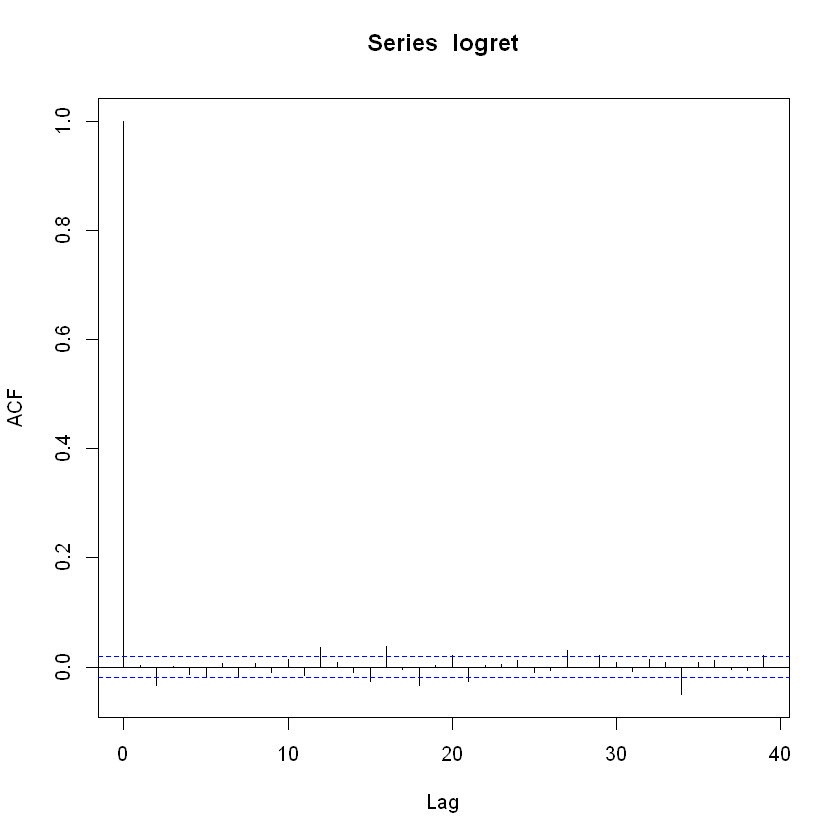

In [46]:
# Auto-correlation f(x) of logret
acf(logret) # dashed lines - 95% confidence band for the acf around 0 - As if it is outside the band - then there is significant
# Serial correlation

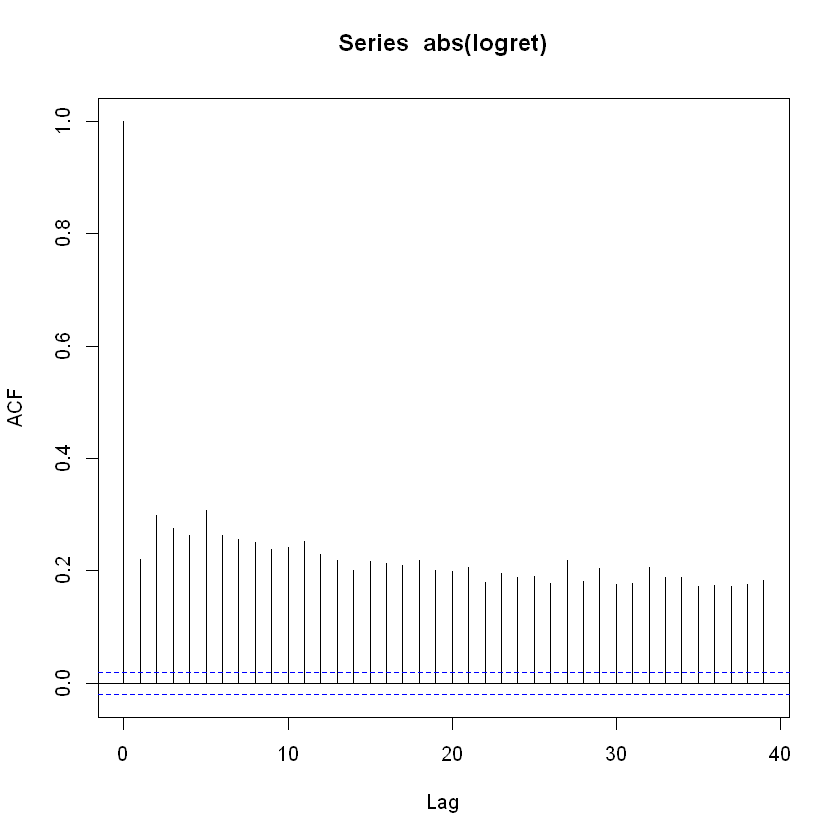

In [47]:
# Volatility Clustering
# ACF for Wilshire 5000 daily log-returns
acf(abs(logret)) # absolute value

### GARCH(1,1)


In [48]:
install.packages("rugarch")
library(rugarch)

package 'rugarch' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\HP\AppData\Local\Temp\Rtmp2na4pG\downloaded_packages


Warning message:
"package 'rugarch' was built under R version 3.6.3"Loading required package: parallel

Attaching package: 'rugarch'

The following object is masked from 'package:stats':

    sigma



In [49]:
garch.N <- ugarchspec(variance.model = list(model = "sGARCH",garchOrder = c(1,1)),
                     mean.model = list(armaOrder = c(0,0),include.mean = TRUE),
                     distribution.model = "norm")
# saving the model as garch.N

In [50]:
fit.garch.N <- ugarchfit(spec = garch.N,data = logret)

In [51]:
fit.garch.N  # Output of estimation


*---------------------------------*
*          GARCH Model Fit        *
*---------------------------------*

Conditional Variance Dynamics 	
-----------------------------------
GARCH Model	: sGARCH(1,1)
Mean Model	: ARFIMA(0,0,0)
Distribution	: norm 

Optimal Parameters
------------------------------------
        Estimate  Std. Error  t value Pr(>|t|)
mu      0.000678    0.000079   8.5808 0.000000
omega   0.000002    0.000001   2.8922 0.003826
alpha1  0.090818    0.007941  11.4369 0.000000
beta1   0.893310    0.008577 104.1528 0.000000

Robust Standard Errors:
        Estimate  Std. Error  t value Pr(>|t|)
mu      0.000678    0.000086  7.89389  0.00000
omega   0.000002    0.000006  0.30116  0.76329
alpha1  0.090818    0.060948  1.49009  0.13620
beta1   0.893310    0.071726 12.45445  0.00000

LogLikelihood : 31772.43 

Information Criteria
------------------------------------
                    
Akaike       -6.6302
Bayes        -6.6272
Shibata      -6.6302
Hannan-Quinn -6.6291

Weig

In [52]:
# save Fitted Values
save1 <- cbind(logret,fit.garch.N@fit$sigma,fit.garch.N@fit$z)
names(save1) <- c("logret","s","z")

In [53]:
# Diagnostic tests on fitted 'et'


In [54]:
# GARCH(1,1)  -t

# Since the GARCH normal model not able to fully explain both volaitility and clustering in heavy tails of the data

garch.t <- ugarchspec(variance.model = list(model = "sGARCH",garchOrder = c(1,1)),
                     mean.model = list(armaOrder = c(0,0),include.mean = TRUE),
                     distribution.model = "std")

fit.garch.t <- ugarchfit(spec = garch.t,data = logret)

fit.garch.t


*---------------------------------*
*          GARCH Model Fit        *
*---------------------------------*

Conditional Variance Dynamics 	
-----------------------------------
GARCH Model	: sGARCH(1,1)
Mean Model	: ARFIMA(0,0,0)
Distribution	: std 

Optimal Parameters
------------------------------------
        Estimate  Std. Error  t value Pr(>|t|)
mu      0.000791    0.000073  10.9034  0.0e+00
omega   0.000001    0.000000   4.1446  3.4e-05
alpha1  0.071278    0.003862  18.4570  0.0e+00
beta1   0.922711    0.003793 243.2372  0.0e+00
shape   6.139380    0.370882  16.5535  0.0e+00

Robust Standard Errors:
        Estimate  Std. Error  t value Pr(>|t|)
mu      0.000791    0.000072  10.9539 0.000000
omega   0.000001    0.000000   1.6339 0.102285
alpha1  0.071278    0.017055   4.1793 0.000029
beta1   0.922711    0.016052  57.4810 0.000000
shape   6.139380    0.477637  12.8537 0.000000

LogLikelihood : 32059.18 

Information Criteria
------------------------------------
                 

In [55]:
# save Fitted Values
save1 <- cbind(logret,fit.garch.t@fit$sigma,fit.garch.t@fit$z)
names(save1) <- c("logret","s","z")

parm1 <- fit.garch.t@fit$coef

In [57]:
# Simulate 1-day ahead with ugarchboot() fxn
set.seed(123789)
boot.garch <- ugarchboot(fit.garch.t,
                        method="Partial",
                        sampling="raw",   #bootstrap fro fitted e
                        n.ahead=1,           #simulation horizon
                        n.bootpred=100000,     #number of simulations
                        solver="solnp")

In [58]:
# Calculate VAR AND ES from simulation

rvec <- boot.garch@fseries
alpha <- 0.05
VAR <- quantile(rvec,alpha)
ES <- mean(rvec[rvec<VAR])

In [ ]:
# Rolling 1-day VAR with ugarchroll()

n2016 <- length(logret["1980-01-01/2016-12-31"])
roll.garch <- ugarchroll(spec=garch.t,
                        data=logret,
                        n.ahead=1,
                        forecast.length=1,
                        n.start= n2016,
                        refit.every=1,
                        refit.window="recursive",
                        calculate.VAR=TRUE,
                        VAR.alpha=0.05,
                        keep.coef=TRUE)